## Importing libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
titanic=pd.read_csv('titanic_train.csv')

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.head()   # Sibsp are siblings ( 0 means not present and 1 means present ) and spouse whereas the parch column is parent and children . 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info() #The data has some missing values like in cabin the null values are those ones and in age also. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis 

In [7]:
titanic.describe()  # on an average ( mean ) only 38% of passengers survived .

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


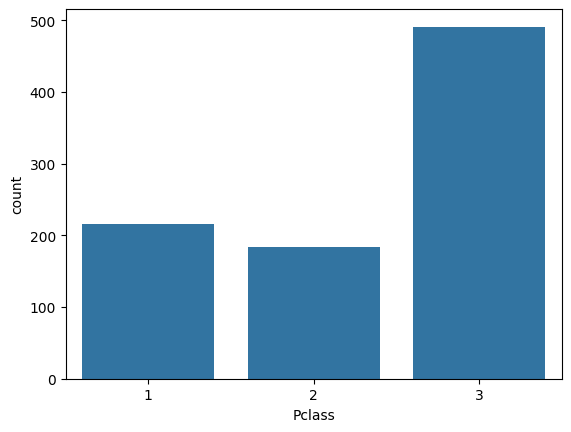

In [8]:
sns.countplot(x='Pclass', data=titanic )  # Class 3 had most passengers. 
plt.show()

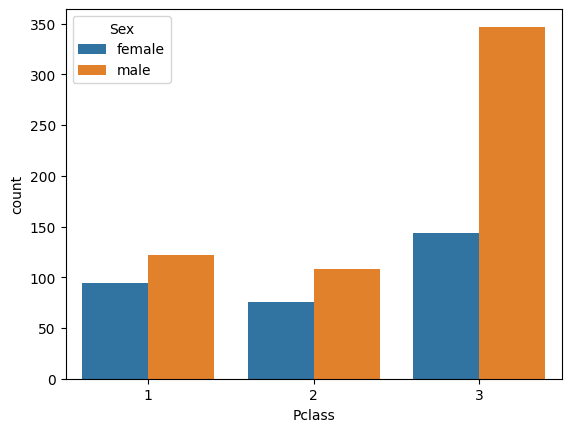

In [9]:
sns.countplot(x='Pclass', data=titanic , hue="Sex" ) # Passengers were mostly male 
plt.show()

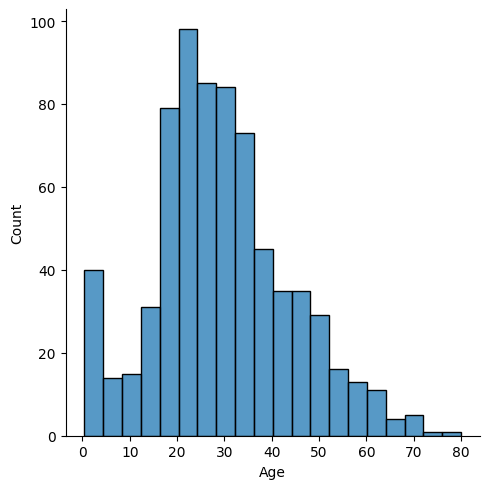

In [10]:
sns.displot(titanic['Age'] ,bins=20) # look the plot , even the new born were present (tragic ) 
plt.show()

In [11]:
titanic['Along']=titanic['SibSp'] + titanic['Parch']  # The along column shows how many people you are accompanied with . 

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [14]:
titanic['Along'].loc[titanic['Along']>0]=1   # Here we are just concerned with are you accompanied by anyone (1) or not(0) 

In [15]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


# Factors of survival 

In [16]:
# We will visualise the data to understand how different columns affect the survival chance . 

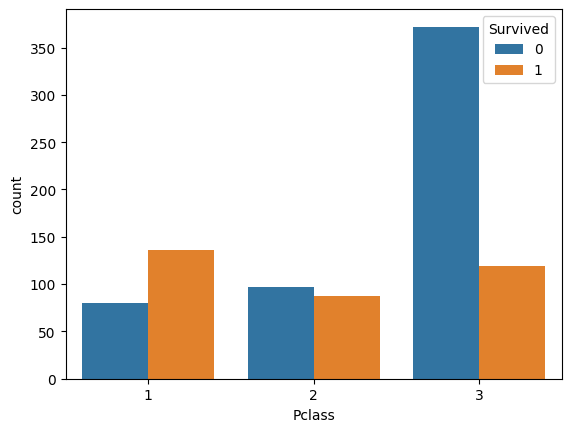

In [17]:
sns.countplot(x='Pclass', data=titanic , hue="Survived" ) # Discrimination against the 3rd class passengers. 
plt.show()

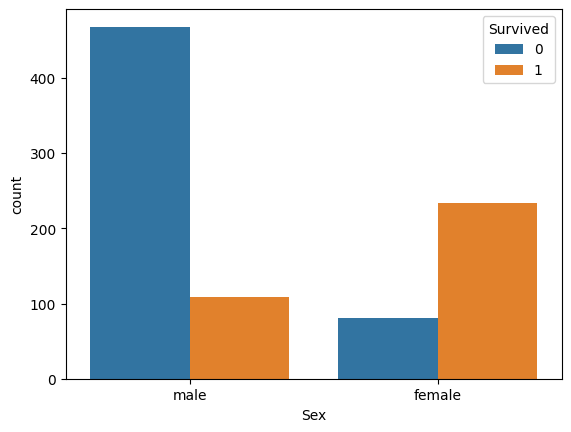

In [18]:
sns.countplot(x='Sex', data=titanic , hue="Survived" ) # Mostly men died in the titanic incident . Show this to Feminists. 
plt.show()

In [19]:
titanic.head() # Name,passenger id , cabin ,ticket are totally irrelevant . Though Fare is also irrevelant but I am not sure because it indicates the class as well. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
titanic=titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

In [21]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [22]:
# Now the only column with non numeric data is the sex column so lets convert it .
titanic['Sex']=np.where(titanic['Sex']=='male',1,0 )  # For male it is 1 

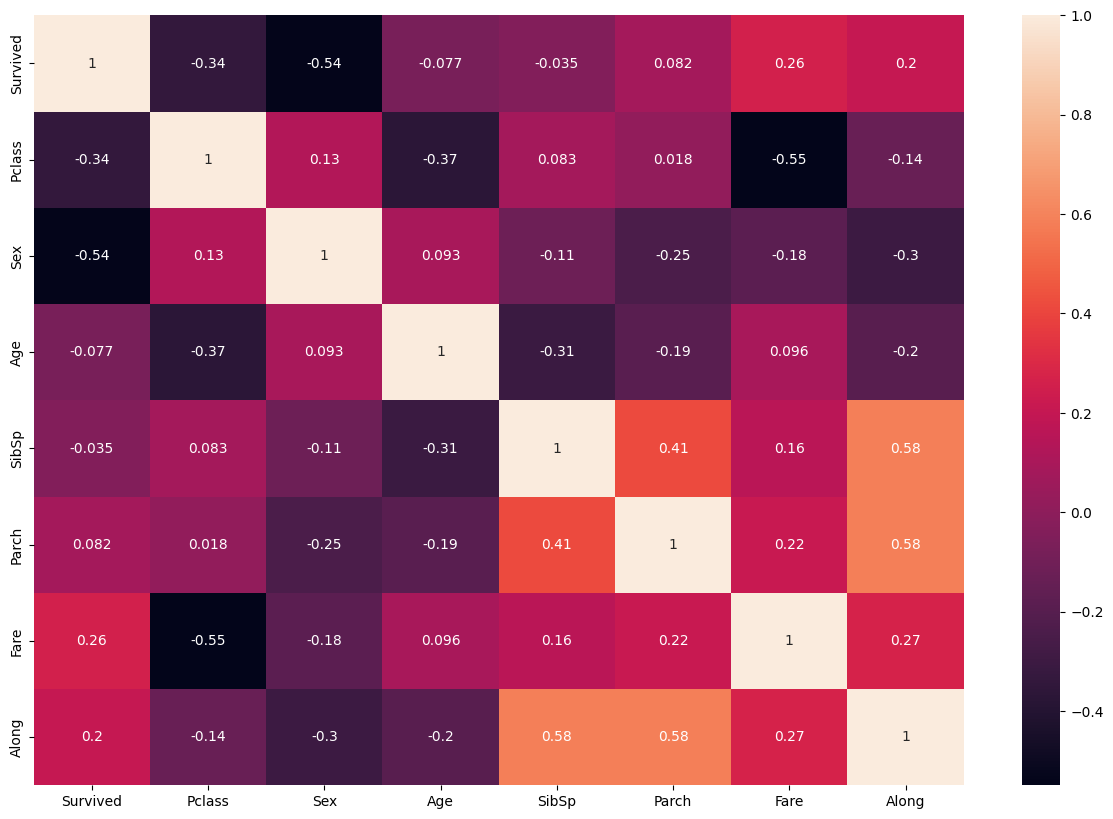

In [23]:
# Finding the correlation. 
plt.figure(figsize=(15,10))
sns.heatmap(titanic.corr(),annot=True )
plt.show()  # Here negative relation means inverse relation .  In sex column it is if moving towards 0 that means it is female . Take only the absolute value or the magnitude . 

## Lets handle the missing values. 

In [24]:
titanic.isnull().sum() # age has the most null values . 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Along         0
dtype: int64

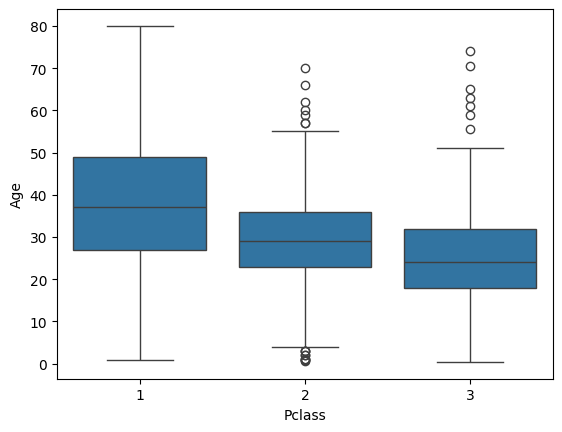

In [25]:
sns.boxplot(x='Pclass',y='Age' , data=titanic)
plt.show() # Here the age is actually the mean age. 

In [26]:
titanic[titanic['Pclass']==1]['Age'].mean()  # Average age of people in class 1 is 38 years. 

38.233440860215055

In [27]:
titanic[titanic['Pclass']==2]['Age'].mean()  # Average age of people in class 2 is 30 years. 

29.87763005780347

In [28]:
titanic[titanic['Pclass']==3]['Age'].mean()  # Average age of people in class 3 is 25 years. 

25.14061971830986

In [29]:
def fill_age(row):
    age=row[0]
    pclass=row[1]
                     #Where ever there is NaN (i.e null) fill those ages by the average age of that particular class using fill_age function 
    if pd.isnull(age):
        if pclass==1:
            return 38.233
        elif pclass==2:
            return 29.877
        else:
            return 25.140
    else:
        return age

In [30]:
titanic['Age']=titanic[['Age','Pclass']].apply(fill_age, axis=1)

In [31]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Along
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,0


In [32]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Along       0
dtype: int64

## Model Building 

In [33]:
# We don't need the survived column 
X=titanic.drop(columns=['Survived'])
y=titanic['Survived']

In [34]:
from sklearn.model_selection import train_test_split 

In [35]:
X_train,X_test,y_train, y_test = train_test_split(X.values, y.values, test_size=0.2 , random_state=0)

In [36]:
X_train.shape,X_test.shape

((712, 7), (179, 7))

In [37]:
from sklearn.tree import DecisionTreeClassifier 

In [38]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=8 ) # Earlier I used entropy as the criterion but will use gini , max_feature etc to increase the accuracy.

In [39]:
model.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=3, max_features=8)

In [40]:
y_pred=model.predict(X_test)

In [41]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [42]:
#Now lets calculate the accuracy 
model.score(X_test,y_test)    # Very low accuracy on the testing data. Earlier I didn't use the max_depth but to prevent overfitting I will use max_depth 

0.8212290502793296

In [43]:
model.score(X_train, y_train)

0.8342696629213483

In [44]:
from sklearn.metrics import classification_report , f1_score 

In [45]:
print(classification_report(y_test , y_pred ) )

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [46]:
f1_score(y_test,y_pred) 

0.7611940298507462

## Visualising the prcess in the tree format 

In [47]:
from sklearn import tree

In [48]:
features=X.columns

In [49]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Along'], dtype='object')

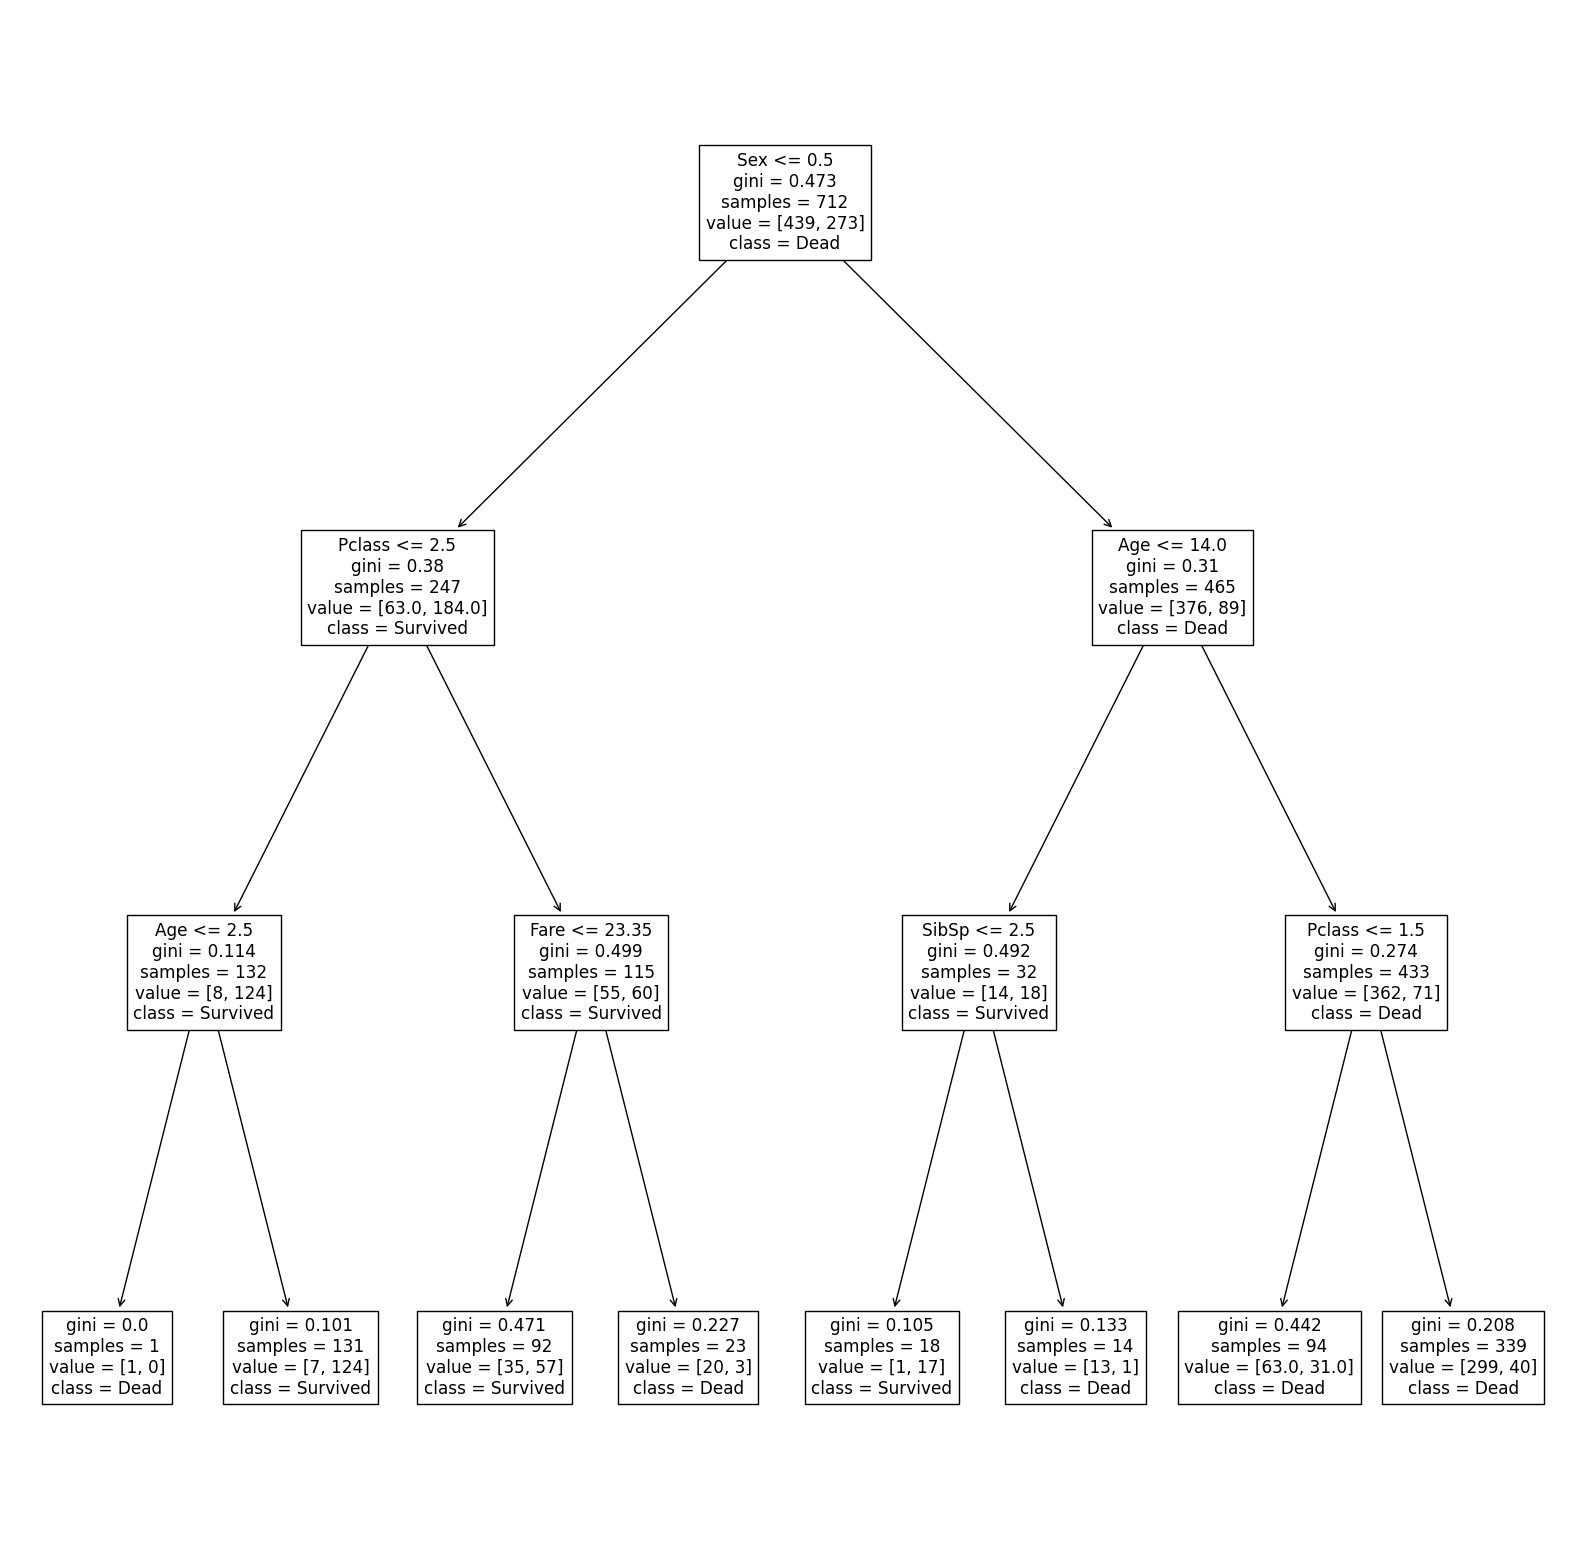

In [50]:
plt.figure(figsize=(20,20))
result=tree.plot_tree(model,feature_names=features,class_names=['Dead','Survived'])  # Conclusion a lot of men died to save men 

In [51]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

In [52]:
forest =RandomForestClassifier()
forest.fit(X_train,y_train) 


RandomForestClassifier()

In [53]:
pred=forest.predict(X_test)

In [54]:
forest.score(X_train, y_train)

0.9803370786516854